In [1]:
import numpy as np
import matplotlib.pyplot as plt
import np_info_analysis as na

In [2]:
'''
matlab colors
#DD6734
#0284C0
'''
yellow='#ffb200'
blue='#0284C0'
red='#DD5544'

name='K4'

In [3]:
print('x\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
print('\t'.join([str(i) for i in range(9)]))

x	y	cx	cy	C	std	int	maxint	relBg
0	1	2	3	4	5	6	7	8


In [4]:
# main_folder='C:/Users/jabuk/Documents/jaderka/ufe/results/'
# folder=main_folder+'L3/'

main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
folder=main_folder+'19_09_06_K4/export_np/'


In [5]:
# np=100
# nm=[2, 1, 5, 6, 7]
# np=80
# nm=[14, 15, 16, 17, 18]
np=60
nm=[21, 22, 23, 24, 27]



files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
21	17.9	7.5	2.72	3.36	2.21	0.00034	0.00721	0.00157	0.00026
n= 9	2.9	1.5	0.80	0.61	0.52	0.00004	0.00235	0.00032	0.00002
--------------------------------------------------------------------------------
22	20.9	9.9	3.45	3.71	2.41	0.00028	0.01074	0.00160	0.00022
n= 8	3.4	2.0	1.29	1.20	0.79	0.00003	0.00535	0.00046	0.00002
--------------------------------------------------------------------------------
23	24.4	8.5	3.92	5.45	3.09	0.00019	0.01089	0.00140	0.00015
n= 9	3.4	0.9	0.96	1.24	0.55	0.00001	0.00401	0.00047	0.00001
--------------------------------------------------------------------------------
24	25.8	12.0	5.13	5.74	3.18	0.00033	0.02696	0.00313	0.00025
n= 10	2.2	3.3	1.53	1.78	0.82	0.00003	0.00894	0.00078	0.00002
--------------------------------------------------------------------------------
27	29.0	14.1	4.03	4.35	2.30	0.00045	0.03076	0.00406	0.00036
n= 10	6.5	3.2	1.23	0.83	0.59	0.00005	0.01059	0.00104	0.00004
-------------------------

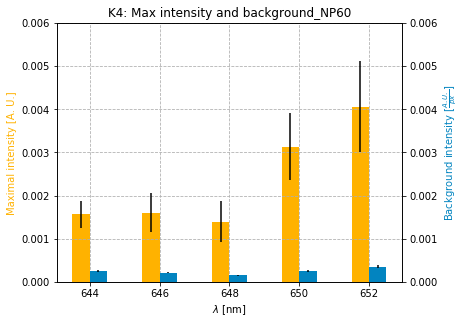

In [6]:
wls=[644 ,646, 648, 650, 652]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]



w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Max intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.006])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.006])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

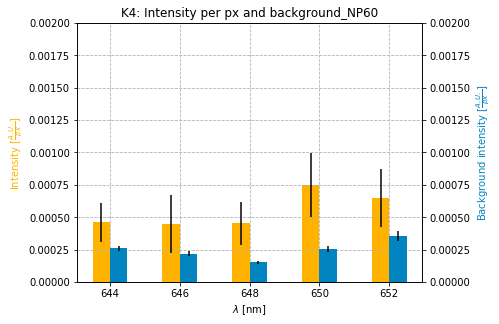

In [7]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per px and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.002])

axes.bar([s-w/2 for s in wls], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

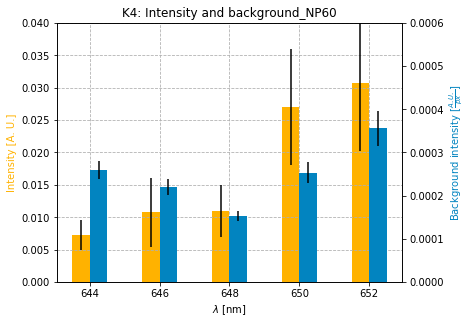

In [8]:
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.04])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0006])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

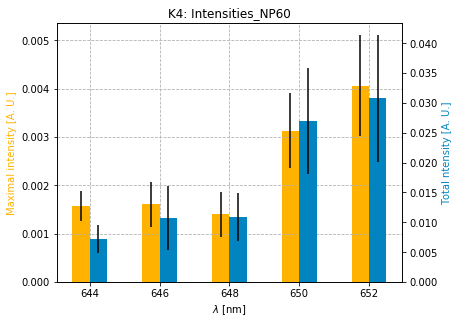

In [9]:
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)

axesI = axes.twinx()
axesI.set_ylabel('Total ntensity [A. U.]', color=blue)

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

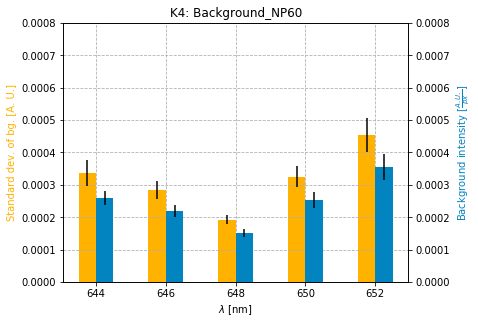

In [10]:
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.5

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Background_NP'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('$\lambda$ [nm]')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.0008])

axes.bar([s-w/2 for s in wls], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in wls], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

## Noise reduction with time

In [16]:
np=734
nm=[5, 6, 15, 15] #jeste 30
# np=730
# nm=[3, 8, 13, 21] #jeste 29



files=[folder+'norm_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]

data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

#     print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
#     print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
#     print(80*'-')

no	x	y	cx	cy	C	std	int	maxint	relBg


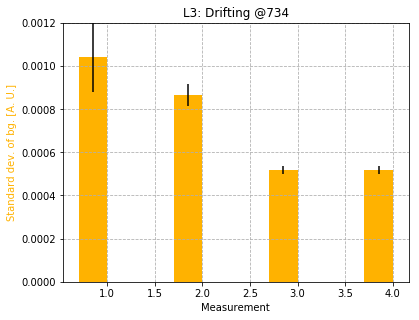

In [17]:
ts=[1, 2, 3, 4]
data1=[d[5] for d in data]
data1_std=[d[5] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Drifting @'+str(np)
axes.set_title(name+': '+title)
axes.set_xlabel('Measurement')
axes.set_ylabel('Standard dev. of bg. [A. U.]', color=yellow)
axes.set_ylim([0, 0.0012])
# axesI = axes.twinx()
# axesI.set_ylabel('Intensity per one px [A. U.]', color=blue)

axes.bar([s-w/2 for s in ts], data1, w, yerr=data1_std, color=yellow, label='x')

# axesI.bar([s+w/2 for s in ts], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# Different NP sizes

In [91]:
wl=648
nm=[5 ,16, 23, 32]  
# wl=650
# nm=[6, 17, 24, 33] 

files=[folder+'raw_{:02.0f}_1'.format(f) for f in nm]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
05	18.5	8.5	4.45	5.08	3.24	0.00021	0.00944	0.00162	0.00017
n= 10	1.3	1.6	1.39	1.68	0.90	0.00001	0.00418	0.00051	0.00001
--------------------------------------------------------------------------------
16	27.0	8.5	4.04	5.69	3.15	0.00021	0.01294	0.00164	0.00017
n= 9	3.3	1.7	0.66	1.58	0.57	0.00002	0.00318	0.00049	0.00001
--------------------------------------------------------------------------------
23	24.4	8.5	3.92	5.45	3.09	0.00019	0.01089	0.00140	0.00015
n= 9	3.4	0.9	0.96	1.24	0.55	0.00001	0.00401	0.00047	0.00001
--------------------------------------------------------------------------------
32	23.1	8.2	2.92	3.98	2.23	0.00019	0.00591	0.00105	0.00015
n= 10	3.3	1.2	0.69	1.24	0.40	0.00002	0.00210	0.00028	0.00001
--------------------------------------------------------------------------------


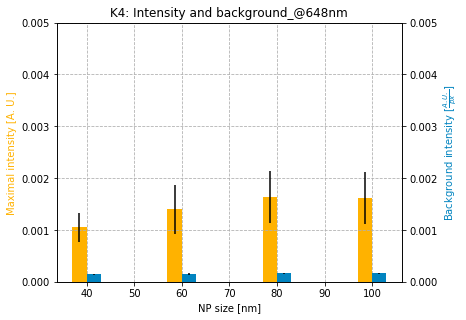

In [81]:
nps=[100, 80, 60, 40]
data1=[d[7] for d in data]
data1_std=[d[7] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=3

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Maximal intensity [A. U.]', color=yellow)
axes.set_ylim([0, 0.005])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.005])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

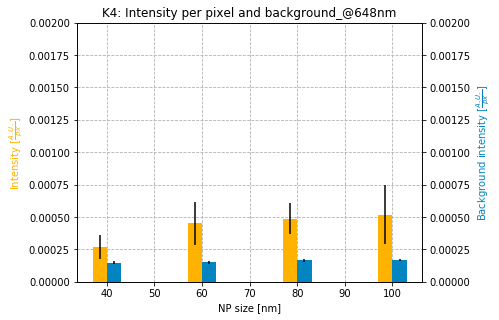

In [82]:
nps=[100, 80, 60, 40]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity per pixel and background_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
axes.set_ylim([0, 0.002])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
axesI.set_ylim([0, 0.002])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

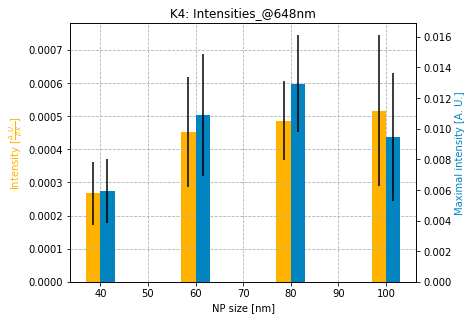

In [83]:
nps=[100, 80, 60, 40]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[6] for d in data]
data2_std=[d[6] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensities_@'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Intensity [$\\frac{A. U.}{px}$]', color=yellow)
# axes.set_ylim([0, 0.12])

axesI = axes.twinx()
axesI.set_ylabel('Maximal intensity [A. U.]', color=blue)
# axesI.set_ylim([0, 0.12])


axes.bar([s-w/2 for s in nps], data3, w, yerr=data3_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

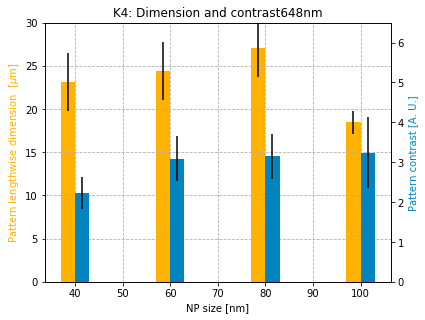

In [92]:
nps=[100, 80, 60, 40]
data1=[d[0] for d in data]
data1_std=[d[0] for d in data_std]
data2=[d[4] for d in data]
data2_std=[d[4] for d in data_std]
area=[d[0]*d[1]/2.93**2 for d in data]

w=3

data3=[data1[i]/area[i] for i in range(len(data1))]
data3_std=[data1_std[i]/area[i] for i in range(len(data1_std))]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Dimension and contrast'+str(wl)+'nm'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Pattern lengthwise dimension  [$\mu$m]',color=yellow)
axes.set_ylim([0, 30])

axesI = axes.twinx()
axesI.set_ylabel('Pattern contrast [A. U.]', color=blue)
axesI.set_ylim([0, 6.5])


axes.bar([s-w/2 for s in nps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in nps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')

# FPS change

In [95]:
fps=[10, 5, 2, 1]  

files=[folder+'norm_32_{}fps'.format(f) for f in fps]
# files+=[folder+'meas_diff_02_1',
#         folder+'meas_diff_03_1',]
print('position in dip')
data=[]
data_std=[]


print('no\tx\ty\tcx\tcy\tC\tstd\tint\tmaxint\trelBg')
for file in files: 
    info=na.readinfo(file)
    info_stat=na.statistics(info)
    data.append(info_stat[0])
    data_std.append(info_stat[1])

    print('{}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(file[-4:-2], *info_stat[0]))
    print('n= {}\t{:.01f}\t{:.01f}\t{:.02f}\t{:.02f}\t{:.02f}\t{:.05f}\t{:.05f}\t{:.05f}\t{:.05f}'.format(info_stat[2], *info_stat[1]))
    print(80*'-')

position in dip
no	x	y	cx	cy	C	std	int	maxint	relBg
0f	32.5	8.5	2.87	3.53	2.34	0.00118	0.05709	0.00639	0.00094
n= 10	4.4	1.6	0.51	0.67	0.42	0.00002	0.01489	0.00090	0.00001
--------------------------------------------------------------------------------
5f	31.9	9.7	3.84	4.27	2.95	0.00093	0.06738	0.00569	0.00074
n= 10	3.1	2.6	0.56	1.13	0.75	0.00002	0.01801	0.00073	0.00002
--------------------------------------------------------------------------------
2f	34.0	13.2	4.53	4.56	3.05	0.00072	0.07840	0.00546	0.00058
n= 10	3.3	4.0	1.06	0.98	0.88	0.00002	0.01811	0.00081	0.00002
--------------------------------------------------------------------------------
1f	34.9	14.1	5.13	4.61	3.05	0.00064	0.08149	0.00540	0.00051
n= 10	3.8	1.8	0.89	0.63	0.44	0.00002	0.01574	0.00071	0.00002
--------------------------------------------------------------------------------


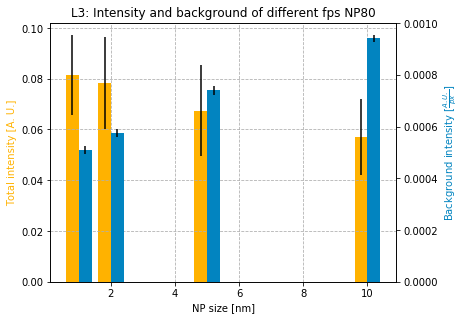

In [101]:
nps=[100, 80, 60]
data1=[d[6] for d in data]
data1_std=[d[6] for d in data_std]
data2=[d[8] for d in data]
data2_std=[d[8] for d in data_std]
area=[d[0]*d[1] for d in data]

w=0.4

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.9])
axes.grid(linestyle='--')

title='Intensity and background of different fps NP80'
axes.set_title(name+': '+title)
axes.set_xlabel('NP size [nm]')
axes.set_ylabel('Total intensity [A. U.]', color=yellow)
# axes.set_ylim([0, 0.008])

axesI = axes.twinx()
axesI.set_ylabel('Background intensity [$\\frac{A. U.}{px}$]', color=blue)
# axesI.set_ylim([0, 0.008])


axes.bar([s-w/2 for s in fps], data1, w, yerr=data1_std, color=yellow, label='x')

axesI.bar([s+w/2 for s in fps], data2, w, yerr=data2_std, color=blue,label='y')
fig.savefig(folder+'plots/'+title.replace(' ', '_').lower()+'_'+name+'.png' , dpi=300,  bbox_inches='tight')